# Introduction
* In this kernel, we will analyze hearth failure and make predictions using machine learning.

<img src = "https://www.fiosgenomics.com/wp-content/uploads/2017/02/CV-icon-opt.png" />

* I will use a library called **Data Science Helper**. This library is written by me and created for saving time and making data science operations with less effort.
* Github link for Data Science Helper: https://github.com/bayhippo/Data-Science-Helper

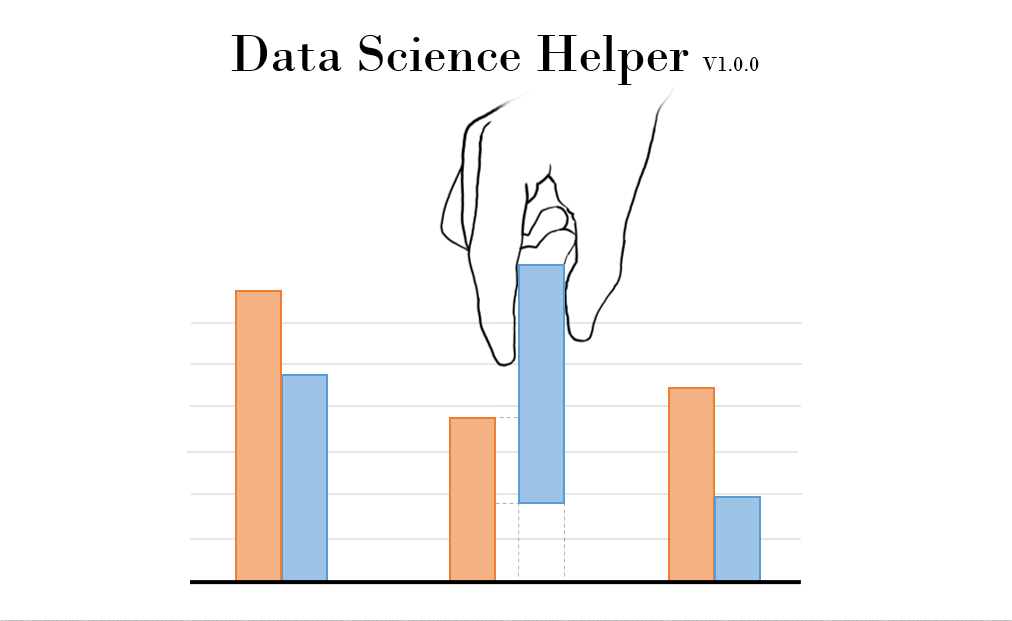

## Content 
* [Imports](#1)
* [Data Analysis](#2)
* [Modeling](#3)
    * [Results](#3.1)
* [Conclusion](#4)

* If you want to learn machine learning you can check out this notebook: https://www.kaggle.com/mrhippo/data-science-notes4-machine-learning-ml

* pip install Data Science Helper

<a id="1"></a> <br>
# Imports

In [ ]:
!pip install datasciencehelper

In [ ]:
# data analysis and visualization
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import  GridSpec
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True) 
import DataScienceHelper as dsh

# sklearn, machine learning
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize, StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id="2"></a> <br>
# Data Analysis

In [ ]:
data = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
data.head()

In [ ]:
data.info()

* Changing dtype for visualization.

In [ ]:
data["anaemia"] = data["anaemia"].astype(str)
data["diabetes"] = data["diabetes"].astype(str)
data["high_blood_pressure"] = data["high_blood_pressure"].astype(str)
data["sex"] = data["sex"].astype(str)
data["smoking"] = data["smoking"].astype(str)
data["DEATH_EVENT"] = data["DEATH_EVENT"].astype(str)

In [ ]:
data.info()

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True,annot_kws = {"size": 12},linecolor = "black", linewidths=0.5, fmt = '.2f', ax=ax,cmap = "BrBG")
plt.title("styled heatmap")
plt.show()

In [ ]:
columns = list(data._get_numeric_data().keys())
dsh.show_kdeplot(data, columns)

In [ ]:
dsh.show_boxplot(data, columns)

In [ ]:
data = dsh.boxcox_skewed_data(data, columns)

<a id="3"></a> <br>
# Modeling

In [ ]:
object_columns = list(data.select_dtypes(include='object').keys())

for feature in object_columns:
    data[feature] = data[feature].astype(int)

In [ ]:
target = data["DEATH_EVENT"]
data_values = data.drop(["DEATH_EVENT"], axis = 1)

In [ ]:
data_values = normalize(data_values)
data_values = StandardScaler().fit_transform(data_values)

In [ ]:
score_list_lr = []
train_list = []
for i in range(1,10):

    x_train, x_test, y_train, y_test = train_test_split(data_values, target,test_size = i/10, random_state = 42)

    lr = LogisticRegression()
    lr.fit(x_train,y_train) 
    print("Test accuracy: {}/Test Size: {}".format(np.round(lr.score(x_test,y_test),3),i))
    score_list_lr.append(lr.score(x_test,y_test))
    train_list.append(lr.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(range(1,10),score_list_lr,label = "Test Accuracy")
ax1.plot(range(1,10),train_list, label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Test Sizes")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores For Each Test Size",fontsize = 17)
ax1.grid(True, alpha = 0.4)

x_train, x_test, y_train, y_test = train_test_split(data_values, target,test_size = (1+score_list_lr.index(np.max(score_list_lr)))/10, random_state = 42)

lr_best = LogisticRegression(random_state = 42)
lr_best = lr_best.fit(x_train, y_train)
y_pred = lr_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy(test): {}/Test Size: {}".format(np.max(score_list_lr),1+score_list_lr.index(np.max(score_list_lr))))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_values, target, test_size = 0.2, random_state = 42)

In [ ]:
score_list_knn = []
train_list = []
for each in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(x_train,y_train)
    print("test accuracy: {}/Neighbors: {}".format(np.round(knn.score(x_test,y_test),3),each))
    score_list_knn.append(knn.score(x_test,y_test))
    train_list.append(knn.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])    

ax1.plot(range(1,25),score_list_knn, label = "Test Accuracy")
ax1.plot(range(1,25),train_list,c = "orange", label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("K Values")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores For Each K Value",fontsize = 17)
ax1.grid(True , alpha = 0.4)

knn_best = KNeighborsClassifier(n_neighbors = 1+score_list_knn.index(np.max(score_list_knn)))
knn_best = knn_best.fit(x_train, y_train)
y_pred = knn_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy(test): {}/Neighbors: {}".format(np.max(score_list_knn),1+score_list_knn.index(np.max(score_list_knn))))

In [ ]:
score_list_svm = []
train_list = []
for each in range(100,500,50):
    svm = SVC(cache_size = each )
    svm.fit(x_train,y_train)
    print("test accuracy: {}/Cache Size: {}".format(np.round(svm.score(x_test,y_test),3),each))
    score_list_svm.append(svm.score(x_test,y_test))
    train_list.append(svm.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  
    
ax1.plot(range(100,500,50),score_list_svm, label = "Test Accuracy")
ax1.plot(range(100,500,50),train_list,c = "orange", label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Cache Sizes")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores For Each Cache Size",fontsize = 17)
ax1.grid(True , alpha = 0.4)

svm_best = SVC(cache_size = 50*(1+score_list_svm.index(np.max(score_list_svm))))
svm_best = svm_best.fit(x_train, y_train)
y_pred = svm_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy(test): {}/Cache Size: {}".format(np.max(score_list_svm),50+50*(1+score_list_svm.index(np.max(score_list_svm)))))

In [ ]:
score_list_dt = []
train_list = []
for d in range(1,10):
    clf = DecisionTreeClassifier(max_depth = d,random_state = 42)
    clf = clf.fit(x_train, y_train)
    print("Test accuracy: {}/Max Depth: {}".format(np.round(clf.score(x_test,y_test),3),d))
    score_list_dt.append(clf.score(x_test,y_test))
    train_list.append(clf.score(x_train,y_train))
    
fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  
    
ax1.plot(range(1,10),score_list_dt,label = "Test Score")
ax1.plot(range(1,10),train_list,label = "Train Score")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Accuracy")
ax1.grid(True, alpha = 0.5)
ax1.set_title("Accuricies for each Max Depth Value",fontsize = 17)

dt_best = DecisionTreeClassifier(max_depth = 1+score_list_dt.index(np.max(score_list_dt)))
dt_best = dt_best.fit(x_train, y_train)
y_pred = dt_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Max Depth: {}".format(np.max(score_list_dt),1+score_list_dt.index(np.max(score_list_dt))))

In [ ]:
score_list_rf = []
train_list = []
for i in range(20,160,20):
    rf = RandomForestClassifier(n_estimators = i, random_state = 42) #100
    rf.fit(x_train,y_train)
    print("Test Score: {}/Number of Estimators: {} ".format(np.round(rf.score(x_test,y_test),3),i))
    score_list_rf.append(rf.score(x_test,y_test))
    train_list.append(rf.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  

ax1.plot(range(20,160,20),score_list_rf,label = "Test Accuracy")
ax1.plot(range(20,160,20),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("N Estimators")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each N Estimator",fontsize = 17)
ax1.grid(True, alpha=0.5)

rf_best = RandomForestClassifier(n_estimators = 20*(1+score_list_rf.index(np.max(score_list_rf))))
rf_best = rf_best.fit(x_train, y_train)
y_pred = rf_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Max Depth: {}".format(np.max(score_list_rf),20*(1+score_list_rf.index(np.max(score_list_rf)))))


In [ ]:
score_list_per = []
train_list = []
for i in np.arange(0.0001, 0.001, 0.0001):
    perceptron = Perceptron(alpha = i, random_state = 42) 
    perceptron.fit(x_train,y_train)
    print("Test Score: {}/Alpha: {} ".format(np.round(perceptron.score(x_test,y_test),3),np.round(i,5)))
    score_list_per.append(perceptron.score(x_test,y_test))
    train_list.append(perceptron.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])      

ax1.plot(np.arange(0.0001,0.001, 0.0001),score_list_per,label = "Test Accuracy")
ax1.plot(np.arange(0.0001,0.001, 0.0001),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Alphas")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Alpha",fontsize = 17)
ax1.grid(True, alpha=0.5)    

per_best = Perceptron(alpha = 0.0001+0.0001*(1+score_list_per.index(np.max(score_list_per))))
per_best = per_best.fit(x_train, y_train)
y_pred = per_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Alpha: {}".format(np.max(score_list_per),0.0001*(1+score_list_per.index(np.max(score_list_per)))))

In [ ]:
score_list_sgd = []
train_list = []
for i in np.arange(0.05, 0.3, 0.02):
    sgd = SGDClassifier(epsilon = i, random_state = 42) 
    sgd.fit(x_train,y_train)
    print("Test Score: {}/Epsilon: {} ".format(np.round(sgd.score(x_test,y_test),3),np.round(i,4)))
    score_list_sgd.append(sgd.score(x_test,y_test))
    train_list.append(sgd.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])    

ax1.plot(np.arange(0.05, 0.3, 0.02),score_list_sgd,label = "Test Accuracy")
ax1.plot(np.arange(0.05, 0.3, 0.02),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Epsilons")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Epsilon", fontsize = 17)
ax1.grid(True, alpha=0.5)

sgd_best = SGDClassifier(epsilon = 0.03+0.02*(1+score_list_sgd.index(np.max(score_list_sgd))))
sgd_best = sgd_best.fit(x_train, y_train)
y_pred = sgd_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Epsilon: {}".format(np.max(score_list_sgd),0.03+0.02*(1+score_list_sgd.index(np.max(score_list_sgd)))))

In [ ]:
score_list_ridge = []
train_list = []
for i in np.arange(0.0005, 0.003, 0.0005):
    ridge = RidgeClassifier(tol = i, random_state = 42) 
    ridge.fit(x_train,y_train)
    print("Test Score: {}/Tol: {} ".format(np.round(ridge.score(x_test,y_test),3),np.round(i,4)))
    score_list_ridge.append(ridge.score(x_test,y_test))
    train_list.append(ridge.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  

ax1.plot(np.arange(0.0005, 0.003, 0.0005),score_list_ridge,label = "Test Accuracy")
ax1.plot(np.arange(0.0005, 0.003, 0.0005),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Tols")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Tol",fontsize = 17)
ax1.grid(True, alpha=0.5)

rid_best = RidgeClassifier(tol = 0.0005*(1+score_list_ridge.index(np.max(score_list_ridge))))
rid_best = rid_best.fit(x_train, y_train)
y_pred = rid_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Tol: {}".format(np.max(score_list_ridge),0.0005*(1+score_list_ridge.index(np.max(score_list_ridge)))))

<a id="3.1"></a> <br>
## Results

In [ ]:
dict_models = {"Models":["Logistic Regression",
                       "KNN",
                       "SVC",
                       "Decision Tree",
                       "Random Forest",
                       "Perceptron",
                       "Sthocastic Gradient Descent",
                       "Ridge"],
             "Scores":[np.max(score_list_lr).round(3),
                       np.max(score_list_knn).round(3),
                       np.max(score_list_svm).round(3),
                       np.max(score_list_dt).round(3),
                       np.max(score_list_rf).round(3),
                       np.max(score_list_per).round(3),
                       np.max(score_list_sgd).round(3),
                       np.max(score_list_ridge).round(3)]}

df_scores_models = pd.DataFrame(data=dict_models)
df_scores_models = df_scores_models.sort_values(by = ["Scores"])
df_scores_models.head(len(df_scores_models)) 

In [ ]:
trace1 = go.Bar(
    x = df_scores_models["Models"],
    y = df_scores_models["Scores"],
    text = df_scores_models["Scores"],
    textposition = "auto",
    marker=dict(color = df_scores_models["Scores"],colorbar=dict(
            title="Colorbar"
        ),colorscale="Viridis",))

data = [trace1]
layout = go.Layout(title = "Comparison of Models",template = "plotly_white")

fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(title_text = "Names")
fig.update_yaxes(title_text = "Scores")
fig.show()

<a id="4"></a> <br>
# Conclusion
* **We analyzed and trained models on Heart Failure Prediction dataest.**
* **If there is something wrong with this kernel please let me know in the comments.**

### My other kernels: https://www.kaggle.com/mrhippo/notebooks

* **References:**
* https://www.kaggle.com/mrhippo/data-science-notes4-machine-learning-ml